# 제목

2024.03.10

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 제목
- 설명: 설명
- 사용한 데이터셋
    - [제목](링크): 설명
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA (국민건강보험공단 질병예측 정보)

### 2-1. 데이터 불러오기

In [1]:
import requests
import json
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
with open('service_key.pkl', 'rb') as file:
    service_key = pickle.load(file)

- ServiceKey: 인증키
- numOfRows: 한 페이지 결과 수
- pageNo: 페이지 번호
- type: 데이터 타입 (xml, json)
- dissCd: 질병 코드
    - 1: 감기
    - 2: 눈병
    - 3: 식중독
    - 5: 피부염
- znCd: 지역 코드 (미입력 시 전국 단위)

In [6]:
url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'

params = {
    'serviceKey': service_key,
    'numOfRows': 1000,
    'pageNo': 1,
    'type': 'json',
    'dissCd': '1'
}

response = requests.get(url, params=params)
json.loads(response.content)

{'response': {'header': {'resultCode': 0,
   'resultMsg': 'NORMAL_SERVICE',
   'type': 'json'},
  'body': {'items': [{'dissCd': '1',
     'dt': '20240310',
     'znCd': '11',
     'lowrnkZnCd': '0',
     'cnt': 18400,
     'risk': 1,
     'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'},
    {'dissCd': '1',
     'dt': '20240310',
     'znCd': '26',
     'lowrnkZnCd': '0',
     'cnt': 6708,
     'risk': 1,
     'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'},
    {'dissCd': '1',
     'dt': '20240310',
     'znCd': '27',
     'lowrnkZnCd': '0',
     'cnt': 3933,
     'risk': 1,
     'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'},
    {'dissCd': '1',
     'dt': '20240310',
     'znCd': '28',
     'lowrnkZnCd': '0',
     'cnt': 3827,
     'risk': 1,
     'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'},
    {'dissCd': '1',
     'dt': '20240310',
     'znCd': '29',
    

In [11]:
url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'

params = {
    'serviceKey': service_key,
    'numOfRows': 1000,
    'pageNo': 1,
    'type': 'json',
    'dissCd': '5'
}

response = requests.get(url, params=params)
# json.loads(response.content)

In [12]:
response.text

'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>HTTP ROUTING ERROR</returnAuthMsg>\n\t\t<returnReasonCode>04</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'

우선 기본 파라미터들 넣어서 데이터 추출 성공했는데 총 몇 개의 데이터가 뽑혔는지 확인해 보자.

In [7]:
json.loads(response.content)['response']['body'].keys()

dict_keys(['items', 'totalCount', 'numOfRows', 'pageNo'])

In [8]:
json.loads(response.content)['response']['body']['totalCount']

51

51개... 최대 1000개까지 뽑도록 했는데 **51개**밖에 안 들어왔다는 건 이게 데이터의 전부라는 뜻

In [9]:
pd.DataFrame(json.loads(response.content)['response']['body']['items'])

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240310,11,0,18400,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
1,1,20240310,26,0,6708,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
2,1,20240310,27,0,3933,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
3,1,20240310,28,0,3827,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
4,1,20240310,29,0,3194,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
5,1,20240310,30,0,4865,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
6,1,20240310,31,0,3523,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
7,1,20240310,41,0,19714,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
8,1,20240310,42,0,3003,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
9,1,20240310,43,0,3452,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."


오늘 포함 사흘치 예측 정보를 제공해 준다. 이때 znCd(지역 코드)의 값은 하기와 같다.

- 11: 서울
- 26: 부산
- 27: 대구
- 28: 인천
- 29: 광주
- 30: 대전
- 31: 울산
- 41: 경기
- 42: 강원
- 43: 충북
- 44: 충남
- 45: 전북
- 46: 전남
- 47: 경북
- 48: 경남
- 49: 제주
- 99: 전국

1x는 특별시, 2x ~ 3x는 광역시, 4x는 도, 그리고 99는 전국이다.

우선 4개의 질병 각각에 대해 전국 광역자체단체의 질병 예측 정보를 가져온다.

In [10]:
url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'
disease_df = pd.DataFrame()

for dissCd in ['1', '2', '3', '5']:
    params = {
        'serviceKey': service_key,
        'numOfRows': 1000,
        'pageNo': 1,
        'type': 'json',
        'dissCd': dissCd
    }

    response = requests.get(url, params=params)
    disease_df = pd.concat([
        disease_df, pd.DataFrame(json.loads(response.content)['response']['body']['items'])
    ]).reset_index(drop=True)

disease_df

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240310,11,0,18400,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
1,1,20240310,26,0,6708,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
2,1,20240310,27,0,3933,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
3,1,20240310,28,0,3827,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
4,1,20240310,29,0,3194,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
...,...,...,...,...,...,...,...
199,5,20240312,46,0,2097,2,"보습제를 사용하고 털, 먼지, 화학물질 피하며 신선한 제철 야채와 과일을 통해 비타..."
200,5,20240312,47,0,2733,2,"보습제를 사용하고 털, 먼지, 화학물질 피하며 신선한 제철 야채와 과일을 통해 비타..."
201,5,20240312,48,0,3547,2,"보습제를 사용하고 털, 먼지, 화학물질 피하며 신선한 제철 야채와 과일을 통해 비타..."
202,5,20240312,49,0,508,2,"보습제를 사용하고 털, 먼지, 화학물질 피하며 신선한 제철 야채와 과일을 통해 비타..."


In [11]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dissCd        204 non-null    object
 1   dt            204 non-null    object
 2   znCd          204 non-null    object
 3   lowrnkZnCd    204 non-null    object
 4   cnt           204 non-null    int64 
 5   risk          204 non-null    int64 
 6   dissRiskXpln  204 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.3+ KB


In [12]:
disease_df.isna().sum()

dissCd          0
dt              0
znCd            0
lowrnkZnCd      0
cnt             0
risk            0
dissRiskXpln    0
dtype: int64

In [78]:
disease_df.to_csv('질병_예측.csv')

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 컬럼별 EDA (질병 예측)

- cnt: 질병 예측진료건수
- risk: 질병 예측위험도
    - 1: 관심
    - 2: 주의
    - 3: 경고
    - 4: 위험

In [30]:
disease_df['cnt'].describe()

count       136.000000
mean      13825.102941
std       48642.642197
min          62.000000
25%         923.000000
50%        2582.000000
75%        8525.250000
max      505464.000000
Name: cnt, dtype: float64

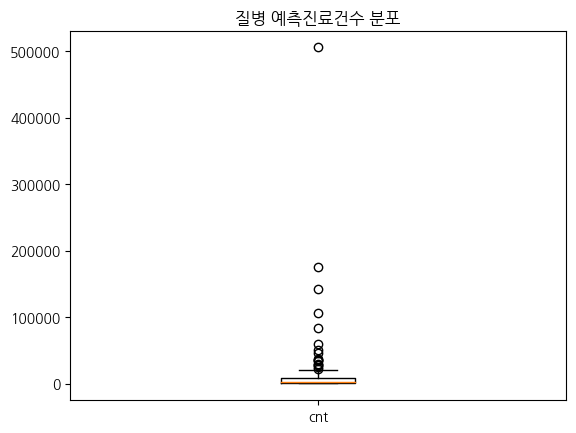

In [35]:
plt.boxplot(
    disease_df['cnt'],
    labels=['cnt']
)

plt.title('질병 예측진료건수 분포')
plt.show()

In [ ]:
# 분포 확인, 시각화, 전처리

In [ ]:
# pickle로 저장

---

## 3. 데이터 로딩 및 EDA ()

In [21]:
with open('service_key.pkl', 'rb') as file:
    service_key = pickle.load(file)

In [43]:
url = 'http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList'

params = {
    'serviceKey': service_key,
    'numOfRows': 1000,
    'pageNo': 1
}

response = requests.get(url, params=params)

In [44]:
import xml.etree.ElementTree as ET

def print_tree(element, indent=""):
    print(indent + element.tag)
    for child in element:
        print_tree(child, indent + "    ")

root = ET.fromstring(response.text)
print_tree(root)

response
    header
        resultCode
        resultMsg
    body
        items
            item
                addr
                clCd
                clCdNm
                cmdcGdrCnt
                cmdcIntnCnt
                cmdcResdntCnt
                cmdcSdrCnt
                detyGdrCnt
                detyIntnCnt
                detyResdntCnt
                detySdrCnt
                drTotCnt
                emdongNm
                estbDd
                hospUrl
                mdeptGdrCnt
                mdeptIntnCnt
                mdeptResdntCnt
                mdeptSdrCnt
                pnursCnt
                postNo
                sgguCd
                sgguCdNm
                sidoCd
                sidoCdNm
                telno
                XPos
                YPos
                yadmNm
                ykiho
            item
                addr
                clCd
                clCdNm
                cmdcGdrCnt
                cmdcIntnCnt
           

In [71]:
print(root.find('body').find('numOfRows').text)

1000


In [45]:
print(root.find('body').find('totalCount').text)

77302


총 77302개의 병원이 있는 것 같다.

In [55]:
for body in root.findall('body'):
    for items in body.findall('items'):
        for item in items.findall('item')[:1]:
            for element in item:
                print(element.tag, element.text)

addr 경기도 수원시 팔달구 중부대로 93, (지동)
clCd 01
clCdNm 상급종합
cmdcGdrCnt 0
cmdcIntnCnt 0
cmdcResdntCnt 0
cmdcSdrCnt 0
detyGdrCnt 0
detyIntnCnt 0
detyResdntCnt 0
detySdrCnt 7
drTotCnt 293
emdongNm 지동
estbDd 19670523
hospUrl http://www.cmcvincent.or.kr/skip.html
mdeptGdrCnt 2
mdeptIntnCnt 0
mdeptResdntCnt 38
mdeptSdrCnt 246
pnursCnt 0
postNo 16247
sgguCd 310603
sgguCdNm 수원팔달구
sidoCd 310000
sidoCdNm 경기
telno 031-1577-8588
XPos 127.0274271
YPos 37.2779855
yadmNm 가톨릭대학교 성빈센트병원
ykiho JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ3OSQzNjEwMDIjODEjJDEjJDIjJDgz


모든 데이터를 다 뽑아낼 필요는 없을 것 같고, 다음의 데이터들을 선별하면 좋을 듯하다.

- yadmNm: 병원명
- clCd: 종별코드
- clCdNm: 종별코드명
- sidoCd: 시도코드
- sidoCdNm: 시도명
- sgguCd: 시군구코드
- sgguCdNm: 시군구명
- drTotCnt: 의사총수
- XPos: x좌표
- YPos: y좌표

In [62]:
results = []
for body in root.findall('body'):
    for items in body.findall('items'):
        for item in items.findall('item')[:5]:
            item_result = {}
            for element in item:
                if element.tag in ['yadmNm', 'clCd', 'clCdNm', 'sidoCd', 'sidoCdNm', 'sgguCd', 'sgguCdNm', 'drTotCnt', 'XPos', 'YPos']:
                    item_result[element.tag] = element.text
            for key in ['yadmNm', 'clCd', 'clCdNm', 'sidoCd', 'sidoCdNm', 'sgguCd', 'sgguCdNm', 'drTotCnt', 'XPos', 'YPos']:
                if key not in item_result.keys():
                    item_result[key] = None
            results.append(item_result)

In [64]:
pd.DataFrame(results)

,clCd,clCdNm,drTotCnt,sgguCd,sgguCdNm,sidoCd,sidoCdNm,XPos,YPos,yadmNm
0,01,상급종합,293,310603,수원팔달구,310000,경기,127.0274271,37.2779855,가톨릭대학교 성빈센트병원
1,01,상급종합,247,220003,인천부평구,220000,인천,126.7248987,37.4848309,가톨릭대학교인천성모병원
2,01,상급종합,188,320100,강릉시,320000,강원,128.8578411,37.8184325,강릉아산병원
3,01,상급종합,346,110016,종로구,110000,서울,126.9677500,37.5684083,강북삼성병원
4,01,상급종합,362,110023,광진구,110000,서울,127.0718276,37.5403764,건국대학교병원


이런 식으로 뽑으면 되겠다

In [76]:
page = 1
results = []

while True:
    url = 'http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList'

    params = {
        'serviceKey': service_key,
        'numOfRows': 1000,
        'pageNo': page
    }

    response = requests.get(url, params=params)
    for body in root.findall('body'):
        for items in body.findall('items'):
            for item in items.findall('item'):
                item_result = {}
                for element in item:
                    if element.tag in ['yadmNm', 'clCd', 'clCdNm', 'sidoCd', 'sidoCdNm', 'sgguCd', 'sgguCdNm', 'drTotCnt', 'XPos', 'YPos']:
                        item_result[element.tag] = element.text
                for key in ['yadmNm', 'clCd', 'clCdNm', 'sidoCd', 'sidoCdNm', 'sgguCd', 'sgguCdNm', 'drTotCnt', 'XPos', 'YPos']:
                    if key not in item_result.keys():
                        item_result[key] = None
                results.append(item_result)
    
    if len(root.find('body').find('items').findall('item')) < int(root.find('body').find('numOfRows').text):
        break
    
    print(f'{page}페이지 로딩 완료! (현재 개수: {len(results)}개')
    page += 1

1페이지 로딩 완료! (현재 개수: 1000개
2페이지 로딩 완료! (현재 개수: 2000개
3페이지 로딩 완료! (현재 개수: 3000개
4페이지 로딩 완료! (현재 개수: 4000개
5페이지 로딩 완료! (현재 개수: 5000개
6페이지 로딩 완료! (현재 개수: 6000개
7페이지 로딩 완료! (현재 개수: 7000개
8페이지 로딩 완료! (현재 개수: 8000개
9페이지 로딩 완료! (현재 개수: 9000개
10페이지 로딩 완료! (현재 개수: 10000개
11페이지 로딩 완료! (현재 개수: 11000개
12페이지 로딩 완료! (현재 개수: 12000개
13페이지 로딩 완료! (현재 개수: 13000개
14페이지 로딩 완료! (현재 개수: 14000개
15페이지 로딩 완료! (현재 개수: 15000개
16페이지 로딩 완료! (현재 개수: 16000개
17페이지 로딩 완료! (현재 개수: 17000개
18페이지 로딩 완료! (현재 개수: 18000개
19페이지 로딩 완료! (현재 개수: 19000개
20페이지 로딩 완료! (현재 개수: 20000개
21페이지 로딩 완료! (현재 개수: 21000개
22페이지 로딩 완료! (현재 개수: 22000개
23페이지 로딩 완료! (현재 개수: 23000개
24페이지 로딩 완료! (현재 개수: 24000개
25페이지 로딩 완료! (현재 개수: 25000개
26페이지 로딩 완료! (현재 개수: 26000개
27페이지 로딩 완료! (현재 개수: 27000개
28페이지 로딩 완료! (현재 개수: 28000개
29페이지 로딩 완료! (현재 개수: 29000개
30페이지 로딩 완료! (현재 개수: 30000개
31페이지 로딩 완료! (현재 개수: 31000개
32페이지 로딩 완료! (현재 개수: 32000개
33페이지 로딩 완료! (현재 개수: 33000개
34페이지 로딩 완료! (현재 개수: 34000개
35페이지 로딩 완료! (현재 개수: 35000개
36페이지 로딩 완료! (현재 개수: 36000개
37페이지 로딩 완

KeyboardInterrupt: 

In [77]:
pd.DataFrame(results).to_csv('병원.csv')

In [74]:
len(results)

1000

---

## 3. 데이터 분석

### 3-1. 문제 정의

내용

### 3-2. 데이터 분석

In [ ]:
# 가설 검정, 머신러닝, ...

### 3-3. 결과 해석

내용

---

## 4. 후기

내용